<a href="https://colab.research.google.com/github/Shrisha1/Learning-Tensorflow/blob/master/SobelFiterUsing3DConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import skimage.io
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  return img

In [0]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

(669, 640, 3)


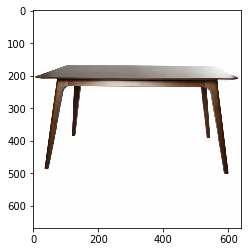

In [74]:
sess = tf.Session()
#Read Image from any web address and save it with a given name 
content_path = tf.keras.utils.get_file('table.jpg', 'https://www.mattblatt.com.au/media/catalog/product/cache/1ae9fb32beb9fd68c443029f41f82931/k/s/xks-tab-007-newport-dining-table--9.jpg.pagespeed.ic.sMTJJfzYwX.jpg')
image = load_img(content_path)
#Convert image to np array , cast it to float32 and expand dimension batchsize to 1 for 
#single image so as to become ompatible input for tf.image.sobel_edges  
image=sess.run(image)
image=np.array(image)
plt.imshow(image)
print(image.shape)
image = tf.cast(image, tf.float32)


In [0]:
sobel_x=tf.constant([-1,0,1,-2,0,2,-1,0,1],shape=[3,3,1,1],dtype=tf.float32)
im = tf.expand_dims(tf.transpose(image, [2, 0, 1]),0)
sobel_x_filter = tf.reshape(sobel_x, [1, 3, 3, 1, 1])
conv = tf.transpose(tf.squeeze(tf.nn.conv3d(im[...,None], sobel_x_filter,
                    strides=[1,1,1,1,1],padding='SAME')), [1,2,0])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[  762.   762.   762.]
  [    0.     0.     0.]
  [    0.     0.     0.]
  ...
  [    0.     0.     0.]
  [    0.     0.     0.]
  [ -762.  -762.  -762.]]

 [[ 1016.  1016.  1016.]
  [    0.     0.     0.]
  [    0.     0.     0.]
  ...
  [    0.     0.     0.]
  [    0.     0.     0.]
  [-1016. -1016. -1016.]]

 [[ 1016.  1016.  1016.]
  [    0.     0.     0.]
  [    0.     0.     0.]
  ...
  [    0.     0.     0.]
  [    0.     0.     0.]
  [-1016. -1016. -1016.]]

 ...

 [[ 1016.  1016.  1016.]
  [    0.     0.     0.]
  [    0.     0.     0.]
  ...
  [    0.     0.     0.]
  [    0.     0.     0.]
  [-1016. -1016. -1016.]]

 [[ 1016.  1016.  1016.]
  [    0.     0.     0.]
  [    0.     0.     0.]
  ...
  [    0.     0.     0.]
  [    0.     0.     0.]
  [-1016. -1016. -1016.]]

 [[  762.   762.   762.]
  [    0.     0.     0.]
  [    0.     0.     0.]
  ...
  [    0.     0.     0.]
  [    0.     0.     0.]
  [ -762.  -762.  -762.]]]


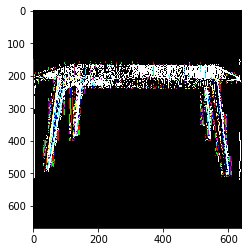

In [76]:
sobelImage=sess.run(conv)
print(sobelImage)
plt.imshow(sobelImage)